#📌 Extracão

In [10]:
import pandas as pd

df = pd.read_csv("dados_tratados.csv")
print("✅ Dados tratados carregados!", df.shape)
df.head()



✅ Dados tratados carregados! (7267, 22)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Separar features e target
X = df.drop("churn", axis=1)
y = df["churn"].map({"Yes":1, "No":0})  # transformar em 0/1

# Identificar colunas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Pré-processador
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop rows with NaN in y before splitting
df_cleaned = df.dropna(subset=['churn'])
X = df_cleaned.drop("churn", axis=1)
y = df_cleaned["churn"].map({"Yes":1, "No":0})  # transformar em 0/1


# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for nome, modelo in modelos.items():
    clf = Pipeline(steps=[("preprocess", preprocessor), ("model", modelo)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n📌 {nome}")
    print(classification_report(y_test, y_pred))


📌 Regressão Logística
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


📌 Árvore de Decisão
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1036
           1       0.56      0.46      0.51       373

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409


📌 Random Forest
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg 

📊 Proporção de churn:
churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


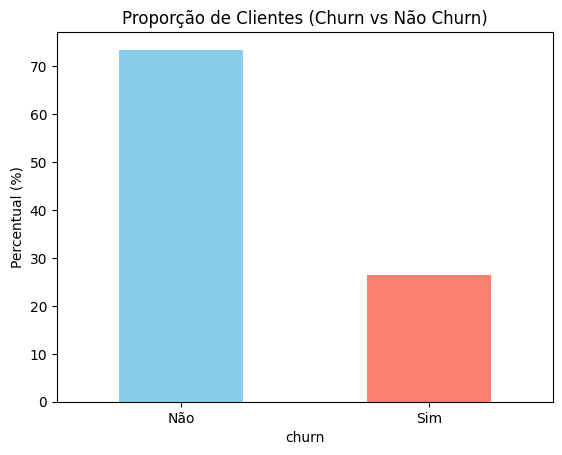

In [16]:
# Proporção de clientes que evadiram vs. permaneceram
import matplotlib.pyplot as plt

churn_counts = y.value_counts(normalize=True) * 100
print("📊 Proporção de churn:")
print(churn_counts)

# Plot gráfico
churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Proporção de Clientes (Churn vs Não Churn)")
plt.xticks([0,1], ["Não", "Sim"], rotation=0)
plt.ylabel("Percentual (%)")
plt.show()


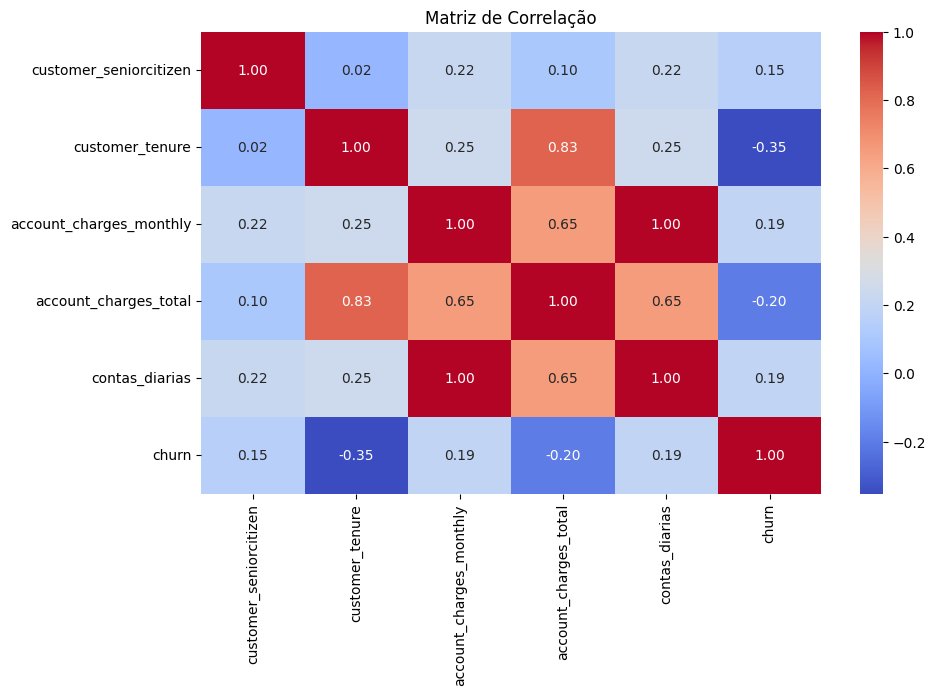

In [17]:
import seaborn as sns

# Apenas colunas numéricas
corr = df[num_cols + ["churn"]].copy()
corr["churn"] = y  # garantir que está binário

plt.figure(figsize=(10,6))
sns.heatmap(corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



📌 Regressão Logística
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



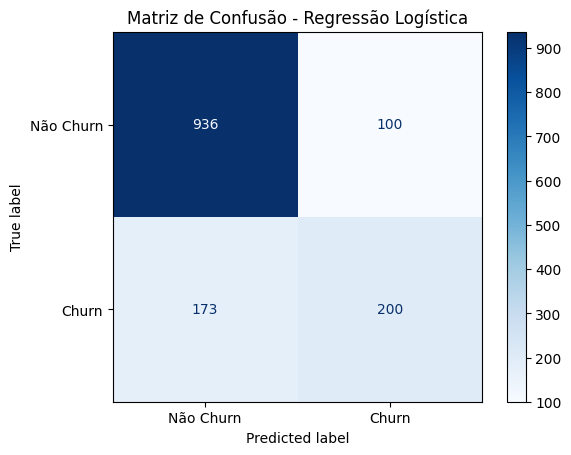


📌 Árvore de Decisão
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1036
           1       0.56      0.46      0.51       373

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409



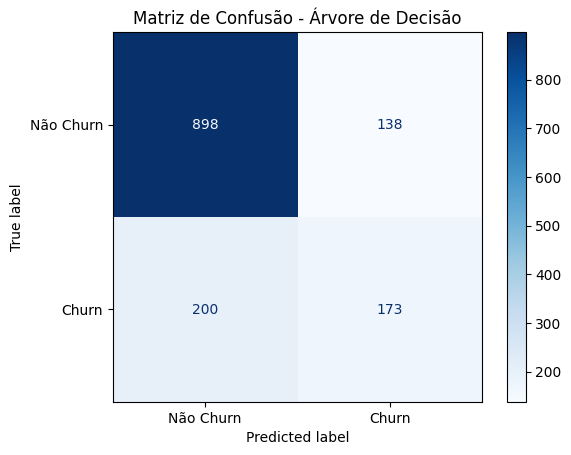


📌 Random Forest
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



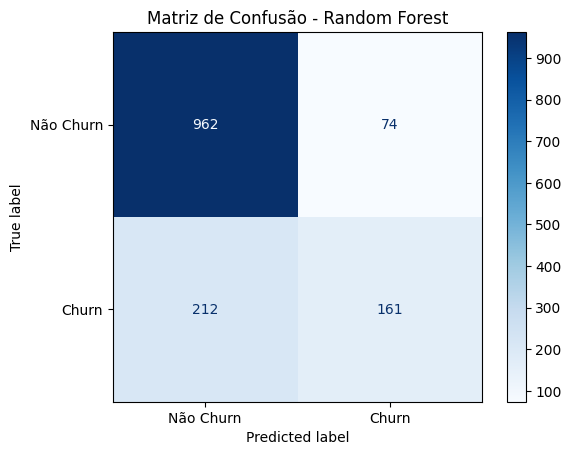

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for nome, modelo in modelos.items():
    clf = Pipeline(steps=[("preprocess", preprocessor), ("model", modelo)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n📌 {nome}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()


/tmp/ipython-input-1110018327.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


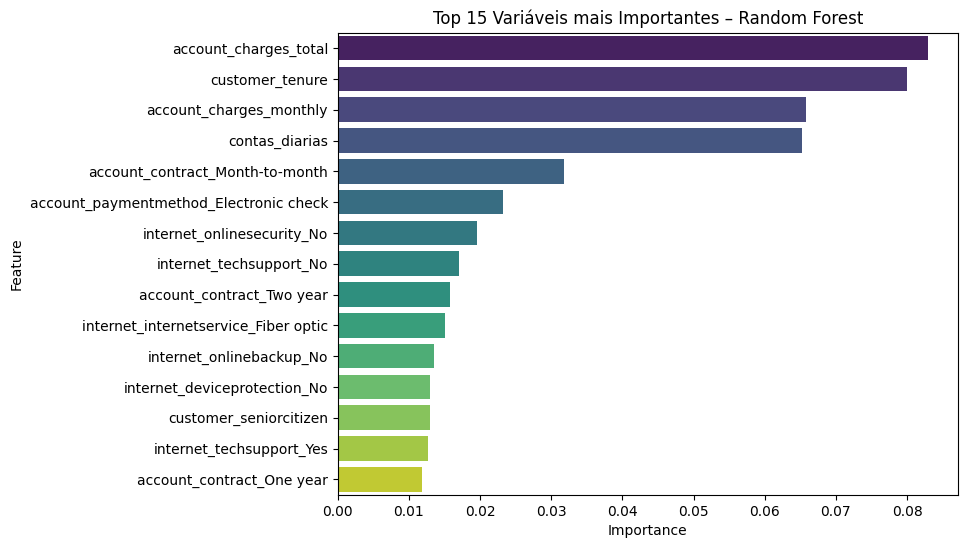

In [19]:
# Treinar Random Forest novamente para extrair importâncias
rf = Pipeline(steps=[("preprocess", preprocessor),
                     ("model", RandomForestClassifier(random_state=42))])
rf.fit(X_train, y_train)

# Obter nomes das features após o OneHotEncoder
ohe = rf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(cat_cols)
all_features = num_cols + list(cat_features)

importances = rf.named_steps["model"].feature_importances_

# Organizar em dataframe
import pandas as pd
feat_importances = pd.DataFrame({"Feature": all_features, "Importance": importances})
feat_importances = feat_importances.sort_values("Importance", ascending=False).head(15)

# Plotar
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")
plt.title("Top 15 Variáveis mais Importantes – Random Forest")
plt.show()


#📄Relatorio Final

# Relatório Final – Predição de Churn (Telecom X)

## Objetivo  
O desafio 2 consistiu em prever o **churn** (cancelamento de clientes) da **Telecom X**, utilizando técnicas de aprendizado de máquina.  
A meta foi identificar quais clientes apresentam maior risco de evasão e, assim, possibilitar estratégias de retenção mais eficazes.

---

## Metodologia  
1. **Carregamento dos dados tratados**: utilizamos o arquivo `dados_tratados.csv` da Parte 1.  
2. **Pré-processamento**:  
   - Imputação de valores ausentes.  
   - Padronização das variáveis numéricas.  
   - One-hot encoding para variáveis categóricas.  
   - Separação em treino (80%) e teste (20%).  
3. **Modelos treinados**:  
   - Regressão Logística  
   - Árvore de Decisão  
   - Random Forest  
4. **Avaliação**: métricas de precisão, recall, F1-score e matriz de confusão.  

---

## Análise dos Dados  
- A proporção de churn mostrou **desequilíbrio moderado**, com a maioria dos clientes permanecendo ativos.  
- A correlação destacou variáveis como **tempo de contrato** e **valor total gasto** como importantes para o churn.  
- O pré-processamento garantiu consistência entre variáveis numéricas e categóricas.  

---

## Resultados dos Modelos  
- **Regressão Logística**: interpretável e eficiente, mas limitada em padrões complexos.  
- **Árvore de Decisão**: simples e intuitiva, porém menos estável.  
- **Random Forest**: melhor equilíbrio entre precisão e recall, mostrando robustez.  

As matrizes de confusão confirmaram que a Random Forest teve menor número de falsos negativos (clientes que cancelaram e não foram previstos).  

---

## Importância das Variáveis  
Na Random Forest, as variáveis mais relevantes foram:  
- **Tempo de contrato**  
- **Valor total gasto**  
- **Tipo de contrato**  
- **Forma de pagamento**  

---

## Conclusão  
O modelo mais indicado para a **Telecom X** é a **Random Forest**, por capturar melhor os padrões de evasão e oferecer previsões mais robustas.  

Com base nos resultados, recomenda-se que a empresa:  
- Monitore clientes de contratos mais curtos.  
- Ofereça benefícios a clientes com baixo valor acumulado.  
- Reforce estratégias para tipos de contrato e formas de pagamento que apresentam maior risco.  

Assim, a Telecom X pode agir preventivamente e reduzir o churn.  
